In [25]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
pandas.set_option('display.max_columns', 500)

def parse_string_into_dataframe(string):
    run_info = string.split('\n')
    words_to_remove = ['mins', 'secs', 'hrs', 'days']
    def isfloat(num):
        try:
            float(num)
            return True
        except ValueError:
            return False

    parsed_run_info = []
    for x in run_info:
        if x:
            parsed_run_info.append([])
            split_x = x.split()
            for x in split_x:
                if x not in words_to_remove:
                    if isfloat(x):
                        parsed_run_info[-1].append(float(x))
                    else:
                        parsed_run_info[-1].append(x)
    data = pandas.DataFrame(data=parsed_run_info[1:], columns=parsed_run_info[0])
    return data


def bar_scatter_plot(data, x, y, hue=None, ax=None):
    ax = sns.barplot(data=data, x=x, y=y, hue=hue, errwidth=0, ax=ax)
    sns.swarmplot(
        x=x, 
        y=y, 
        hue=hue, 
        data=data, dodge=True, alpha=1, ax=ax, linewidth=1.5, legend=None,
    )
    if hue:
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    #plt.show()

In [26]:
import os
import subprocess

# Add XT to my path
os.environ['PATH'] += ':/Users/psoulos/opt/anaconda3/envs/blackboard/bin'


job_id_to_data = {}

def get_job_data(job_ids):
    #if job_ids in job_id_to_data:
    #    return job_id_to_data[job_ids]
    job_string = 'job{},' * len(job_ids)
    job_list_function = 'xt --config=../xt_config.yaml list runs {} --last=100 --child'.format(job_string.format(*job_ids))
    result = subprocess.check_output(job_list_function, shell=True)
    # Decode the response and get the relevant lines
    result = result.decode("utf-8").split('\n')[2:-5]
    result[0] = result[0].replace('\x1b[0m', '')
    result = parse_string_into_dataframe('\n'.join(result))
    #job_id_to_data[job_id] = result
    return result




In [27]:
result = get_job_data([550])
result = result.drop(result[result['status'] != "completed"].index)
result

,run,status,trainable_parameters,router_type,router_hidden_dim,router_num_layers,entropy_regularization_epochs,entropy_regularization_start,eps_uniform,softmax_steps,train_acc,valid_acc,best_train_acc,best_valid_acc,op_grad_estimator,query_grad_estimator,ctrl_type,ctrl_hidden_dim,ctrl_num_layers,blackboard_steps,transformer_norm_first,transformer_activation,filler_emb_gain,wd,num_warmup_steps,optim_beta2,batch_size,transformer_nheads,lr,epoch,steps,duration
0,run550.0,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.973,0.997,0.980,0.997,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.95,64.0,4.0,0.000001,509.0,"80,000",11.2
1,run550.1,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.98,64.0,4.0,0.000001,509.0,"80,000",11.1
2,run550.2,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.309,0.329,0.359,0.446,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.95,64.0,4.0,0.000001,509.0,"80,000",11.1
3,run550.3,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.515,0.494,0.526,0.494,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.98,64.0,4.0,0.000001,509.0,"80,000",11.2
4,run550.4,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.95,64.0,4.0,0.000001,509.0,"80,000",11.1
5,run550.5,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.989,1.000,0.991,1.000,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.98,64.0,4.0,0.000001,509.0,"80,000",11.2
6,run550.6,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.959,0.980,0.972,0.981,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.95,64.0,4.0,0.000001,509.0,"80,000",11.0
7,run550.7,completed,8560770.0,transformer,256.0,1.0,0.0,0.0,0.0,1.0,0.331,0.329,0.347,0.329,softmax,softmax,mean,64.0,1.0,8.0,1.0,gelu,1.0,0.1,10000.0,0.98,64.0,4.0,0.000001,509.0,"80,000",11.1


0.12% have perfect accuracy


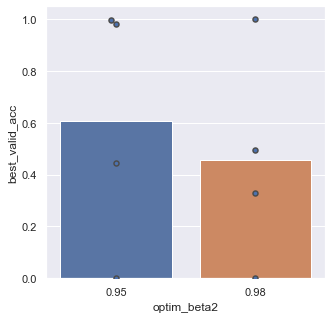

In [28]:
import warnings
import itertools
warnings.filterwarnings('ignore')

print('{:.2f}% have perfect accuracy'.format(sum(result['best_valid_acc'] == 1) / len(result.index)))


relevant_variables = [
    'optim_beta2',
    #'lr',
    #'router_num_layers',
    #'ctrl_hidden_dim',
    #'transformer_nheads',
]
'''
'router_num_layers',
'blackboard_steps',
'entropy_regularization_epochs',
'input_norm',
'''
plot_variables = relevant_variables + list(itertools.combinations(relevant_variables, 2))


'''
plot_variables = [
    ('router_type',),
    ('entropy_regularization_start',),
    ('router_num_layers',),
    ('router_hidden_dim',),
    ('blackboard_steps',),
    ('ctrl_type',),
    ('ctrl_hidden_dim',),
    ('ctrl_num_layers',),
    
    #('wd',),
    #('transformer_activation',),
    #('transformer_norm_first',),
    #('filler_emb_gain',),
    #('num_warmup_steps',),
    #('optim_beta2',),
    
    ('entropy_regularization_start', 'router_num_layers'),
    ('entropy_regularization_start', 'router_hidden_dim'),
    ('router_hidden_dim', 'router_num_layers'),
    ('ctrl_num_layers', 'ctrl_hidden_dim'),
    ('ctrl_num_layers', 'router_hidden_dim'),
    ('ctrl_num_layers', 'router_num_layers'),
    ('ctrl_hidden_dim', 'router_hidden_dim'),
    ('ctrl_hidden_dim', 'router_num_layers'),
    ('blackboard_steps', 'router_num_layers'),
    #('blackboard_steps', 'wd'),
    #('blackboard_steps', 'num_warmup_steps'),
    #('blackboard_steps', 'optim_beta2'),
]
'''


num_plots = len(plot_variables)
fig, axs = plt.subplots(nrows=num_plots, figsize=(5,5*num_plots))
for i, plot_variable in enumerate(plot_variables):
    #print(plot_variable)
    if type(plot_variable) is tuple:
        x = plot_variable[0]
        hue = plot_variable[1]
    else:
        x = plot_variable
        hue = None

    if num_plots == 1:
        bar_scatter_plot(data=result, x=x, y='best_valid_acc', hue=hue, ax=axs)
    else:
        bar_scatter_plot(data=result, x=x, y='best_valid_acc', hue=hue, ax=axs[i])
    
plt.show()

bar_scatter_plot(data=result, x='softmax_steps', hue="eps_uniform", y='best_valid_acc')

In [81]:
result[result['transformer_nheads'] == 8]

,run,status,trainable_parameters,router_type,router_hidden_dim,router_num_layers,entropy_regularization_epochs,entropy_regularization_start,eps_uniform,softmax_steps,train_acc,valid_acc,best_train_acc,best_valid_acc,op_grad_estimator,query_grad_estimator,ctrl_type,ctrl_hidden_dim,ctrl_num_layers,blackboard_steps,transformer_norm_first,transformer_activation,filler_emb_gain,wd,num_warmup_steps,optim_beta2,batch_size,transformer_nheads,lr,epoch,steps,duration
4,run531.4,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.1406,0.169,0.375,0.169,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00001,127.0,"20,000",3.4
5,run531.5,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.0000,0.000,0.000,0.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00010,127.0,"20,000",3.7
6,run531.6,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0001,0.0,1.0,1.0000,1.000,1.000,1.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00001,127.0,"20,000",3.5
7,run531.7,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0001,0.0,1.0,0.1875,0.148,0.375,0.148,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00010,127.0,"20,000",3.5
12,run531.12,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.0000,0.000,0.000,0.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00001,127.0,"20,000",3.4
13,run531.13,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.0000,0.000,0.000,0.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00010,127.0,"20,000",3.4
15,run531.15,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0001,0.0,1.0,0.0000,0.000,0.000,0.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00010,127.0,"20,000",3.5


In [80]:
result[result['lr'] == 1e-5]

,run,status,trainable_parameters,router_type,router_hidden_dim,router_num_layers,entropy_regularization_epochs,entropy_regularization_start,eps_uniform,softmax_steps,train_acc,valid_acc,best_train_acc,best_valid_acc,op_grad_estimator,query_grad_estimator,ctrl_type,ctrl_hidden_dim,ctrl_num_layers,blackboard_steps,transformer_norm_first,transformer_activation,filler_emb_gain,wd,num_warmup_steps,optim_beta2,batch_size,transformer_nheads,lr,epoch,steps,duration
0,run531.0,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.0000,0.000,0.000,0.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,4.0,0.00001,127.0,"20,000",3.4
2,run531.2,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0001,0.0,1.0,0.5469,0.494,0.750,0.494,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,4.0,0.00001,127.0,"20,000",3.4
4,run531.4,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.1406,0.169,0.375,0.169,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00001,127.0,"20,000",3.4
6,run531.6,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0001,0.0,1.0,1.0000,1.000,1.000,1.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00001,127.0,"20,000",3.5
8,run531.8,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.0000,0.000,0.000,0.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,4.0,0.00001,127.0,"20,000",3.5
10,run531.10,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0001,0.0,1.0,0.0938,0.148,0.250,0.148,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,4.0,0.00001,127.0,"20,000",3.5
12,run531.12,completed,19432592.0,transformer,512.0,2.0,-1.0,0.0010,0.0,1.0,0.0000,0.000,0.000,0.000,softmax,softmax,mean,128.0,1.0,8.0,1.0,gelu,1.0,0.01,10000.0,0.98,64.0,8.0,0.00001,127.0,"20,000",3.4
